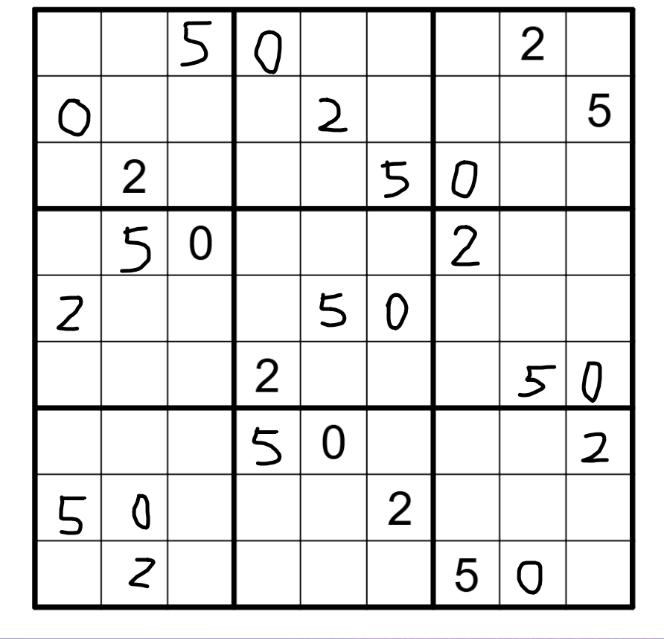

In [1]:
from math import gcd
from itertools import combinations, permutations
from functools import reduce

def rotate_right(s):
    """
    Returns a string rotated by moving the last character to the front.
    E.g., rotate_right("013426785") -> "501342678"
    """
    return s[-1] + s[:-1]

def all_rotations(num_str):
    """
    Generate all 9 cyclical variants of num_str by repeatedly rotating
    the last digit to the front. The first variant is num_str itself.
    """
    rotations = [num_str]
    current = num_str
    for _ in range(8):
        current = rotate_right(current)
        rotations.append(current)
    return rotations

def compute_gcd_of_list(values):
    """
    Compute the GCD of a list of integers.
    """
    return reduce(gcd, values)

def letsgo():
    # Digits we can use to fill the 6 blank positions
    candidate_digits = [1, 3, 4, 6, 7, 8, 9]
    
    best_gcd = 0
    best_number_str = None

    # Choose which 6 digits out of the 7 we will use
    for chosen_6 in combinations(candidate_digits, 6):
        # Permute those 6 digits in all possible orders
        for perm in permutations(chosen_6):
            # Construct the 9-digit number as a string "0xxx2xxx5"
            # Indices:  0 1 2 3 4 5 6 7 8
            # Template: 0 p0 p1 2 p2 p3 p4 p5 5
            num_list = [
                '0',
                str(perm[0]),
                str(perm[1]),
                str(perm[2]),
                '2',
                str(perm[3]),
                str(perm[4]),
                str(perm[5]),
                '5'
            ]
            num_str = "".join(num_list)
            
            # Generate its 9 cyclical variants
            rotations = all_rotations(num_str)

            # Convert each variant to an integer (this discards leading zeros, which is fine)
            values = [int(r) for r in rotations]

            # Compute GCD of these 9 integers
            current_gcd = compute_gcd_of_list(values)

            # Update our best if we found a larger GCD
            if current_gcd > best_gcd:
                best_gcd = current_gcd
                best_number_str = num_str

    print("==============================================")
    print(f"Largest GCD found: {best_gcd}")
    print(f"Corresponding 9-digit pattern: {best_number_str}")
    if best_number_str is not None:
        print("Cyclical rotations and their integers:")
        for r in all_rotations(best_number_str):
            print(f"  {r} -> {int(r)}")
    print("==============================================")

In [2]:
letsgo()

Largest GCD found: 12345679
Corresponding 9-digit pattern: 061728395
Cyclical rotations and their integers:
  061728395 -> 61728395
  506172839 -> 506172839
  950617283 -> 950617283
  395061728 -> 395061728
  839506172 -> 839506172
  283950617 -> 283950617
  728395061 -> 728395061
  172839506 -> 172839506
  617283950 -> 617283950
